# About GMM

- Unsupervised model
- for clustering and segmentation analysis
- Hence I find that the gaussian mixer model, which is the cluster analysis algortihm we will learn, is a perfect fit, it works with probabilities, meaning that I can be long 60 percent to cluster, eight, 30 percent to be and 10 percent to see.

- How it works?
  - GMM is probabilist method for clustering
  - Divide data in groups identificating gaussian distribuition in groups
  - Better to use than traditional clustering algorithms, like Kmeans
  - The probabilities allow to better evaluate edge cases(data points can be in two distribuitions in same time)

- Key Ideias
  - Kmeans in general is circle groups in space points. GMM can be eliptical, oval or circle groups in space points.
    - The cluster sizes do not have specific structures that might or might not apply.
  - GMM adapt your data
  - No need to standardize data
  - Faster to compute
  - Poor at dealing low amount of data points

- GMM step by step
  1. Prepare Dataset
  2. Find optimal clustes
  3. Perform GMM
  4. Interpret Results


## [AIC](http://arquivo.ufv.br/dbg/resumos2008b/Resumo%20Claudomiro.htm)
The Akaike Information Criterion (AIC) has the existence of a “real” model that describes the data that are unknown, and tries to choose between a group of evaluation models, or that minimizes the Kullback-Leible divergence (K-L). The value of K-L for a model with parameters, in version by model is . This divergence is related to the information lost by using an approximate model and not the “real one”. The estimation of the AIC for a given model is by: in which model, the MLFV the parameters and the number of parameters. **The model with the __lowest__ value and AIC is considered the best fit model,**
- AIC = -2L + 2k 
  - L: max likelihood function of model
  - k: number of parameters (data columns)

## [BIC](http://arquivo.ufv.br/dbg/resumos2008b/Resumo%20Claudomiro.htm)
The Bayesian Schwarz Criterion (BIC) assumes the existence of a “true model” that describes the relationship between the dependent variable and the various explanatory variables among the various models under selection. Thus, the criterion is defined as the statistic that maximizes the probability of identifying the true model among those evaluated. The value of the BIC criterion for a given model is given by: , with the number of observations. **The model with the __lowest__ BIC is considered the best fit.**
- BIC = -2L + 2kln(n)
  - L: max likelihood function of model
  - k: number of parameters (data columns)
  - n: number of samples

# Case study briefing - country segmentation
- Socio-Economica Data: Data with country socio-economic data
  1. Find Optimal Number of cluster
  2. Visualize optimal number of clusters
  3. Create clusters
  4. Interpret the clusters
   
- Visualization -> Key Ideias
  - Groups observations in terms of their characteristics
  - Main task of exploratory data mining
  - Clustering is an art rather than Science

# Libraries

In [8]:
# !pip install scikit-learn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

# Load Dataset

In [20]:
data = pd.read_csv("./data/Country-data.csv")
dataset = data.iloc[:, 1:]
display(data.head())
display(dataset.head())
print(dataset.shape)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


(167, 9)


`Country` is not use because is very categorical data and we not to do a cut in groups.

# Clustering

Finding optimal number of cluster.
- Akaike`s information criterion (AIC) and Bayesian Information Criterion (BIC);
- Trade off between simple model and goodness fit and we need search right balance in our research;
- Key Ideas
  - Its based in max likelihood function:
    - AIC: Akaike information criterion for the current model on the input X.
    - BIC: Bayesian information criterion for the current model on the input X. 
  - AIC and BIC helps us determining the optimal number of clusters
  - AIC and BIC provide a means to select a model
  - Trade-off between simplicity and goodness of fit
  - Deal with overfitting and underfitting

Text(0.5, 0, 'number of components')

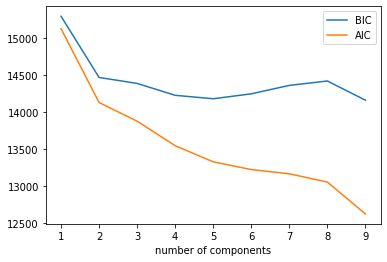

In [21]:
# 10 runs models generated
n_components = np.arange(1,10)

# Model initiate
models = [GaussianMixture(n, random_state = 1502).fit(dataset) for n in n_components]

# Plots BIC information
plt.plot(n_components,
         [m.bic(dataset) for m in models],
         label = 'BIC')

# Plots AIC information
plt.plot(n_components,
         [m.aic(dataset) for m in models],
         label = 'AIC')
plt.legend()
plt.xlabel('number of components')

- We choose number of components
- Look at the number 7 conitnuous stagnate to decrease. But it`s already happen in number 2.
- But we can try: 2, 4 or 7 components.
- It`s not clear to idenficate a good number. But if want to sell i'll try to make more simple and sofisticated so we test this cases and find the best one fo them.

# Appling GMM model

we need to include in GMM
- number of components
- random state
- all dataset to clustering

In [12]:
model = GaussianMixture(n_components = 4, 
                        random_state = 1502).fit(dataset)

## Interpretation

Predicting cluster by country

In [13]:
cluster = pd.Series(model.predict(dataset))
cluster[:3]

0    1
1    1
2    1
dtype: int64

Above is this clusters predicted for dataset mdoel. Assign a cluster in the dataframe:

In [14]:
data['Cluster'] = cluster
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


searching a specific country

In [15]:
data.loc[data['country'] == 'Portugal']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
122,Portugal,3.9,29.9,11.0,37.4,27200,0.643,79.8,1.39,22500,2


Create the probabilities of belonging to any cluster

In [16]:
probabilities = round(pd.DataFrame(model.predict_proba(dataset)),2)
probabilities.head(2)

,0,1,2,3
0,0.0,1.00,0.00,0.0
1,0.0,0.96,0.04,0.0


joining probabilities with data

In [23]:
data = pd.concat([data, probabilities], axis = 1)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,1,2,3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0,1.00,0.00,0.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.0,0.96,0.04,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0,0.98,0.02,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0,1.00,0.00,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0,0.00,1.00,0.0


In [24]:
data.loc[data['country'] == 'Portugal']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0,1,2,3
122,Portugal,3.9,29.9,11.0,37.4,27200,0.643,79.8,1.39,22500,0.0,0.0,1.0,0.0


# Cluster interpretation

Get clusters means about each one. And get information about the contries: **[This is the output we want to sell]**

In [18]:
interpretation = pd.DataFrame(model.means_,
                              columns = list(dataset.columns))
interpretation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,3.500000,92.900000,9.583333,74.600000,69833.333333,3.295667,81.500000,1.700000,89133.333333
1,56.778410,31.973187,6.189660,44.466457,6230.860951,10.397333,65.702144,3.636511,2931.541250
2,10.585236,50.105673,8.010427,48.449987,28235.545432,3.499218,77.658786,1.916713,23823.053830
3,8.275000,99.100000,2.810000,64.050000,88225.000000,8.708500,79.375000,1.817500,47675.000000


For example:

In [25]:
interpretation.iloc[0]

child_mort        3.500000
exports          92.900000
health            9.583333
imports          74.600000
income        69833.333333
inflation         3.295667
life_expec       81.500000
total_fer         1.700000
gdpp          89133.333333
Name: 0, dtype: float64

- child_mort:  Low
- exports:  High
- health:  High
- imports:  High
- income:  High
- inflation:  Low
- life_expec:  High
- total_fer:  Low
- gdpp:  High


Is this interrpration group we want.

In [19]:
data[data[3] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,0,1,2,3
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3,0.0,0.0,0.0,1.0
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,3,0.0,0.0,0.0,1.0
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,3,0.0,0.0,0.0,1.0
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,0.0,0.0,0.0,1.0
